In [ ]:
from keras.layers import *
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import LeakyReLU

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(200, 200, 3)))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(AveragePooling2D(pool_size=(2, 2)))

# set of FC => RELU layers
model.add(Flatten())

#getting the summary of the model (architecture)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 average_pooling2d (AverageP  (None, 47, 47, 128)      0         
 ooling2D)                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/train.csv', names = ['image', 'label'])

In [ ]:
df

,image,label
0,150.jpg,0
1,151.jpg,0
2,152.jpg,0
3,153.jpg,0
4,154.jpg,0
...,...,...
237,65.jpg,23
238,66.jpg,23
239,67.jpg,23
240,68.jpg,23


In [ ]:
df['label'][df['image'] == '0.jpg'].iloc[0]

19

In [ ]:
dataset = {new_list: [] for new_list in range(24)}

In [ ]:
dataset

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: []}

In [ ]:
# Extractor
for i in range(0, 242):
  img_path = '/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/train_resized/' + str(i) + '.jpg'
  img = image.load_img(img_path, target_size=(200, 200))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  feature = model.predict(img_data)
  label = df['label'][df['image'] == str(i) + '.jpg'].iloc[0]
  dataset[label].append(feature)

print("Save dataset successfully!")

1/1 [==============================] - 0s 159ms/step
Save dataset successfully!


In [ ]:
def extract(img_path):
  img = image.load_img(img_path, target_size=(200, 200))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  feature = model.predict(img_data)
  return feature

In [ ]:
import math 

def cosine_similarty(arr1, arr2):
  deca = 0
  len_arr1 = 0
  len_arr2 = 0
  for i in range(len(arr1)):
    deca += arr1[i] * arr2[i]
    len_arr1 += arr1[i] * arr1[i]
    len_arr2 += arr2[i] * arr2[i]
  return deca / (math.sqrt(len_arr1) * math.sqrt(len_arr2))

In [ ]:
def get_minvalue(inputlist):
    min_value = min(inputlist)
    min_index = inputlist.index(min_value)
    return min_index

In [ ]:
count = 0
for i in range(0, 242):
  arr = []
  feature = extract('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/train_resized/' + str(i) + '.jpg')
  for j in dataset:
    mean_feature = sum(dataset[j]) / len(dataset[j])
    #dist = cosine_similarty(mean_feature[0],feature)
    dist = np.linalg.norm(mean_feature[0] - feature)
    arr.append(dist)
  #print(get_minvalue(arr), '-', df['label'][df['image'] == str(i) + '.jpg'].iloc[0])
  if get_minvalue(arr) == df['label'][df['image'] == str(i) + '.jpg'].iloc[0]:
    count += 1
  else:
    print(i)

1/1 [==============================] - 0s 161ms/step
0
1/1 [==============================] - 0s 153ms/step
3
1/1 [==============================] - 0s 158ms/step
7
1/1 [==============================] - 0s 164ms/step
8
1/1 [==============================] - 0s 156ms/step
13
1/1 [==============================] - 0s 183ms/step
14
1/1 [==============================] - 0s 160ms/step
15
1/1 [==============================] - 0s 159ms/step
20
1/1 [==============================] - 0s 235ms/step
21
1/1 [==============================] - 0s 291ms/step
24
1/1 [==============================] - 0s 272ms/step
25
1/1 [==============================] - 0s 298ms/step
26
1/1 [==============================] - 0s 266ms/step
27
1/1 [==============================] - 0s 292ms/step
28
1/1 [==============================] - 0s 284ms/step
29
1/1 [==============================] - 0s 161ms/step
31
1/1 [==============================] - 0s 154ms/step
39
1/1 [==============================] - 0s 153ms/step

In [ ]:
count / 242

0.6239669421487604

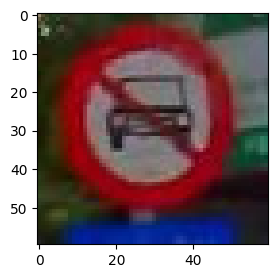

1/1 [==============================] - 0s 161ms/step
Predict label:  8 - Actual label:  8


In [ ]:
import matplotlib.pyplot as plt

img = image.load_img("/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/val_resized/56.jpg")
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax.imshow(img)
plt.show()

arr = []
feature = extract('/content/drive/MyDrive/AI_CAPSTONE_PROJECT/Data/fsl_data/val_resized/56.jpg')
for j in dataset:
  mean_feature = sum(dataset[j]) / len(dataset[j])
  #dist = cosine_similarty(mean_feature[0] - feature)
  dist = np.linalg.norm(mean_feature[0] - feature)
  arr.append(dist)
print("Predict label: ",get_minvalue(arr), '-', 'Actual label: ',df['label'][df['image'] == '59.jpg'].iloc[0])